# Análisis de Datos desde SQLite

En este notebook vamos a leer datos de la base de datos `database/datos.db` usando pandas y crear visualizaciones interesantes.

## 1. Importar Librerías Requeridas

Importamos las librerías necesarias para manipulación de datos, conexión a la base de datos y visualización.

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configurar el estilo de los gráficos
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 2. Conectar a la Base de Datos SQLite

Establecemos la conexión a la base de datos `database/datos.db`.

In [2]:
# Definir la ruta a la base de datos
db_path = '../database/datos.db'

# Verificar si el archivo existe
if os.path.exists(db_path):
    print(f"✓ Base de datos encontrada: {db_path}")
    
    # Crear conexión a SQLite
    conn = sqlite3.connect(db_path)
    print("✓ Conexión establecida exitosamente")
else:
    print(f"✗ No se encontró la base de datos en: {db_path}")

✓ Base de datos encontrada: ../database/datos.db
✓ Conexión establecida exitosamente


## 3. Cargar Datos con Pandas

Leemos los datos de las tablas de la base de datos usando pandas.

In [3]:
# Obtener lista de tablas en la base de datos
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, conn)
print("Tablas disponibles en la base de datos:")
print(tables)
print()

# Cargar datos de cada tabla
dataframes = {}
for table_name in tables['name']:
    try:
        df = pd.read_sql_query(f"SELECT * FROM {table_name}", conn)
        dataframes[table_name] = df
        print(f"✓ Tabla '{table_name}' cargada: {df.shape[0]} filas, {df.shape[1]} columnas")
    except Exception as e:
        print(f"✗ Error al cargar tabla '{table_name}': {e}")
        
print("\nDatos cargados en diccionario 'dataframes'")

Tablas disponibles en la base de datos:
              name
0         usuarios
1  sqlite_sequence
2       produccion
3         mes_data
4     cajas_config

✓ Tabla 'usuarios' cargada: 1 filas, 3 columnas
✓ Tabla 'sqlite_sequence' cargada: 4 filas, 2 columnas
✓ Tabla 'produccion' cargada: 2 filas, 6 columnas
✓ Tabla 'mes_data' cargada: 4382 filas, 14 columnas
✓ Tabla 'cajas_config' cargada: 5 filas, 8 columnas

Datos cargados en diccionario 'dataframes'


## 4. Explorar los Datos

Analizamos la estructura, tipos de datos, valores nulos y estadísticas de los datos.

In [4]:
# Explorar cada tabla
for table_name, df in dataframes.items():
    print(f"\n{'='*60}")
    print(f"TABLA: {table_name}")
    print(f"{'='*60}")
    
    print(f"\nForma del DataFrame: {df.shape}")
    
    print("\nTipos de datos:")
    print(df.dtypes)
    
    print("\nPrimeras 5 filas:")
    print(df.head())
    
    print("\nValores nulos:")
    print(df.isnull().sum())
    
    print("\nEstadísticas descriptivas:")
    print(df.describe())


TABLA: usuarios

Forma del DataFrame: (1, 3)

Tipos de datos:
id        int64
nombre      str
rol         str
dtype: object

Primeras 5 filas:
   id  nombre            rol
0   1  Alexis  Administrador

Valores nulos:
id        0
nombre    0
rol       0
dtype: int64

Estadísticas descriptivas:
        id
count  1.0
mean   1.0
std    NaN
min    1.0
25%    1.0
50%    1.0
75%    1.0
max    1.0

TABLA: sqlite_sequence

Forma del DataFrame: (4, 2)

Tipos de datos:
name      str
seq     int64
dtype: object

Primeras 5 filas:
           name   seq
0      usuarios     1
1    produccion     2
2      mes_data  4382
3  cajas_config     5

Valores nulos:
name    0
seq     0
dtype: int64

Estadísticas descriptivas:
               seq
count     4.000000
mean   1097.500000
std    2189.667326
min       1.000000
25%       1.750000
50%       3.500000
75%    1099.250000
max    4382.000000

TABLA: produccion

Forma del DataFrame: (2, 6)

Tipos de datos:
id            int64
fecha           str
maquina     

## 5. Crear Visualizaciones

Generamos gráficos diversos para visualizar los datos.

### 5.1 OEE en Tiempo (Plotly Express)
Gráfico interactivo de las métricas clave OEE: Disponibilidad, Rendimiento y Calidad.

In [5]:
import plotly.express as px

# Filtrar tabla mes_data si existe
if 'mes_data' in dataframes:
    df_mes = dataframes['mes_data'].copy()
    
    # Asegurar tipos numéricos corrigiendo comas por puntos en caso necesario
    for col in ['Availability', 'Performance', 'Quality']:
        if df_mes[col].dtype == 'object':
            df_mes[col] = df_mes[col].astype(str).str.replace(',', '.').astype(float)
            
    fig = px.line(df_mes, x='db_timestamp', y=['Availability', 'Performance', 'Quality'],
                  title='Evolución OEE en Tiempo Real',
                  labels={'value': 'Porcentaje (%)', 'db_timestamp': 'Tiempo'})
    fig.update_layout(template='plotly_dark')
    fig.show()
else:
    print("La tabla 'mes_data' no está disponible para graficar.")

### 5.2 Producción OK vs NOK (Barras Apiladas)
Visualización directa del balance de piezas Correctas frente a las Rechazadas.

In [6]:
if 'mes_data' in dataframes:
    fig_prod = px.bar(df_mes, x='db_timestamp', y=['Parts_OK', 'Parts_NOK'],
                      title='Producción: Piezas OK vs NOK',
                      labels={'value': 'Cantidad de Piezas', 'db_timestamp': 'Tiempo'},
                      color_discrete_map={'Parts_OK': '#28a745', 'Parts_NOK': '#dc3545'},
                      barmode='stack')
    fig_prod.update_layout(template='plotly_dark')
    fig_prod.show()

### 5.3 KPIs Generales (Matplotlib / Seaborn Moderno)
Distribución de Estados de Máquina actuales.

C:\Users\alexi\AppData\Local\Temp\ipykernel_7580\2672818097.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




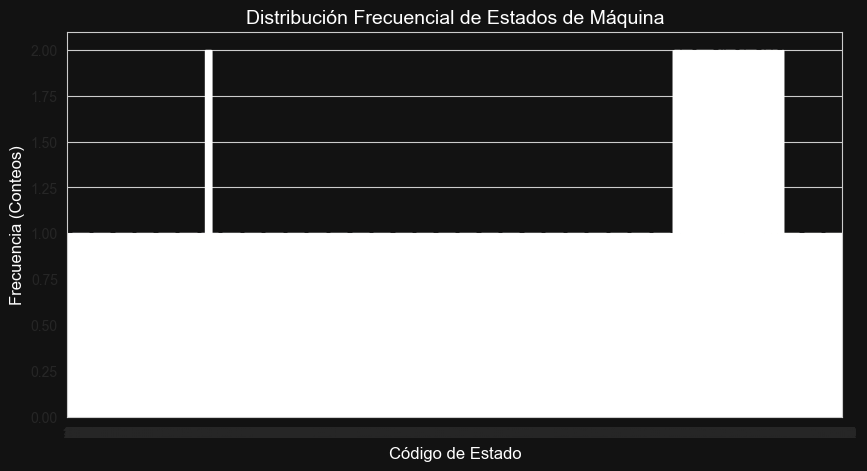

In [7]:
if 'mes_data' in dataframes:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_mes, x='Machine_State', palette='viridis')
    plt.title('Distribución Frecuencial de Estados de Máquina', fontsize=14, color='white')
    plt.xlabel('Código de Estado', fontsize=12, color='white')
    plt.ylabel('Frecuencia (Conteos)', fontsize=12, color='white')
    
    # Adaptar estilo oscuro para matplotlib
    plt.style.use('dark_background')
    ax = plt.gca()
    ax.set_facecolor('#121212')
    plt.gcf().set_facecolor('#121212')
    
    plt.show()